Model :

In [1]:
import math
import cv2
import dlib
import time
from collections import Counter
import pandas as pd
from PIL import Image
import numpy as np
import data_process


class ModelKNN:
    def __init__(self, train_x, train_y):
        self.training_x = train_x
        self.training_t = train_y
        self.emotion_data = self.initial_data()

    def initial_data(self):
        data = {'pixels': [], 'emotion': ''}
        t = pd.DataFrame(data=data)
        return t

    def detect_face(self, img_path):
        detector = dlib.get_frontal_face_detector()
        predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")
        emotions = ['anger', 'contempt', 'happy', 'sadness']
        faceDet = cv2.CascadeClassifier("haarcascade\haarcascade_frontalface_default.xml")
        if img_path == 'video':
            cap = cv2.VideoCapture(0)
            while True:
                k = cv2.waitKey(1)
                ret, img = cap.read()
                # img = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)
                # img = cv2.flip(img, 1)
                gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                faces = faceDet.detectMultiScale(
                    gray,
                    scaleFactor=1.1,
                    minNeighbors=5,
                    minSize=(20, 20)
                )
                for (x, y, w, h) in faces:
                    cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
                    gray = gray[y:y + h, x:x + w]
                    # get_landmarks(img)

                cv2.imshow('video', img)

                if k == 32:
                    try:
                        gray = cv2.resize(gray, (350, 350))
                        print(self.predict(gray, 5))
                    except:
                        print('error')
                if k == 27:
                    break
            cap.release()
            cv2.destroyAllWindows()
            return 'close'

        else:
                frame = cv2.imread(img_path)

                gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

                face = faceDet.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=10, minSize=(5, 5),
                                                flags=cv2.CASCADE_SCALE_IMAGE)
                if len(face) == 1:
                    facefeatures = face
                else:
                    facefeatures = ""

                for (x, y, w, h) in facefeatures:
                    if facefeatures == "":
                        print("no face found in file: %s" % img_path)
                    else:
                        gray = gray[y:y + h, x:x + w]

                detections = detector(gray, 1)
                for k, d in enumerate(detections):
                    shape = predictor(gray, d)
                    for i in range(1, 68):
                        cv2.circle(gray, (shape.part(i).x, shape.part(i).y), 1, (0, 0, 255), thickness=1)
                gray = cv2.resize(gray, (48, 48))
                cv2.imwrite(img_path, gray)


    def train(self, t_data, label):
        for f, b in zip(t_data, label):
            try:
                self.emotion_data.loc[-1] = [f, b]
                self.emotion_data.index = self.emotion_data.index + 1
                self.emotion_data = self.emotion_data.sort_index()
            except:
                print('error in "' + b)

    def euclidean_distance(self, row1, row2):
        distance_x = 0.0
        distance_x += (row1 - row2)**2
        return sum(sum(sum(np.sqrt(distance_x))))


    def predict(self, face, k):
        distance_d = {'distance': [], 'emotion': ''}
        df = pd.DataFrame(data=distance_d)
        for i, r in self.emotion_data.iterrows():
            distance = self.euclidean_distance(self.emotion_data.iloc[i]['pixels'], face)
            df.loc[-1] = [distance, self.emotion_data.iloc[i]['emotion']]
            df.index = df.index + 1
            df = df.sort_index()
        df2 = df.sort_values(by=['distance'], ascending=True, axis=0)[:k]
        counter = Counter(df2['emotion'])
        prediction = counter.most_common()[0][0]
        return prediction


    def test(self, p_data, label):
        correct = 0
        incorrect = 0
        for f, b in zip(p_data, label):
            predict_face = self.predict(f, 5)
            if b == predict_face:
                correct += 1
            else:
                incorrect += 1
        accuracy = (1 / (correct + incorrect)) * correct
        print('correct: ' + str(correct) + '\n' + 'incorrect: ' + str(incorrect) + '\n' + 'accuracy: ' + str(accuracy))

get training data and test data from dataset 1:

In [2]:
train_x, train_y, val_x, val_y = data_process.process_data('dataset.csv', "KNN")

create model and train it with training data, test it afterwards.

In [3]:
model_1 = ModelKNN(train_x, train_y)
model_1.train(train_x, train_y)
model_1.test(val_x,val_y)

correct: 71
incorrect: 25
accuracy: 0.7395833333333333


do the same with data from dataset 2

In [4]:
train_x2, train_y2, val_x2, val_y2 = data_process.process_data('dataset2.csv', "KNN")


train and test it again

In [5]:

model_2 = ModelKNN(train_x2, train_y2)
model_2.train(train_x2, train_y2)
model_2.test(val_x2,val_y2)

correct: 62
incorrect: 34
accuracy: 0.6458333333333333


In [3]:
data_landmarks = pd.read_csv('dataset.csv')
data_landmarks.head()

,pixels,emotion
0,6 5 3 3 5 9 11 11 13 17 22 24 31 32 38 37 34 3...,happy
1,42 19 2 2 9 10 4 2 6 8 10 15 9 12 14 15 19 35 ...,sadness
2,10 0 0 1 0 1 3 4 6 10 21 56 93 117 161 182 195...,sadness
3,172 186 186 145 103 120 202 242 195 180 150 82...,sadness
4,216 218 214 216 215 223 193 67 52 58 65 60 57 ...,sadness


In [50]:
data_no_landmarks = pd.read_csv('dataset2.csv')


X = data.drop('emotion', axis=1)
y = data['emotion']

for pixel_sequence in data_no_landmarks.iloc[0]:
    print('New pixel sequence from here\n')
    print(pixel_sequence)

New pixel sequence from here

9 8 8 8 8 8 11 14 18 18 16 17 19 20 21 24 24 29 36 37 50 69 85 109 154 155 155 163 152 142 133 96 63 63 53 37 32 25 22 22 20 17 17 13 15 27 30 25 7 7 7 8 8 9 11 13 10 13 13 13 16 23 30 35 40 50 55 59 88 118 137 166 183 198 202 192 193 207 187 132 87 72 67 53 36 29 30 22 16 10 13 16 16 25 32 24 5 7 8 7 8 9 11 11 10 11 10 12 22 35 44 48 62 74 80 87 116 139 153 180 208 225 226 204 214 244 220 169 108 92 72 49 44 34 22 20 20 15 15 15 10 21 35 23 5 7 7 6 6 8 9 9 8 8 8 16 32 48 60 67 80 82 102 120 128 141 158 173 196 206 207 198 210 226 204 175 131 110 89 59 40 33 28 23 18 16 12 14 11 17 30 20 6 7 6 4 4 7 8 7 8 7 11 24 38 52 68 84 99 110 120 130 141 142 148 167 180 186 185 187 194 191 175 158 144 131 117 83 51 32 27 28 27 22 12 14 15 15 23 21 10 8 6 4 6 8 9 9 11 9 15 33 49 60 77 97 113 118 133 144 146 156 167 167 165 175 174 176 182 181 171 151 149 135 130 114 83 56 40 20 25 30 22 17 16 17 23 22 13 9 6 6 8 9 9 9 10 9 21 44 63 73 88 107 112 125 137 145 153 163 16

In [34]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)


In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from pprint import pprint


le = LabelEncoder()
target_values = le.fit_transform(data['emotion'])

le1 = LabelEncoder()
values = le1.fit_transform(X)

#one_hot_encoder = OneHotEncoder()
#X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=21)

#one_hot_encoder = one_hot_encoder.fit_transform(X)

#RC = RandomForestClassifier(n_estimators=100, max_features=10)

#RC = RC.fit(X_train, y_train)
#y_predict = RC.predict(X_test)
pprint(data.pixels.head())

0    9 8 8 8 8 8 11 14 18 18 16 17 19 20 21 24 24 2...
1    63 49 14 11 13 15 21 17 17 8 18 20 18 18 24 27...
2    21 22 24 23 24 15 4 5 13 26 37 59 75 84 90 100...
3    92 96 214 255 255 255 254 254 254 255 226 103 ...
4    57 11 4 0 10 9 14 23 28 36 38 46 60 69 71 67 6...
Name: pixels, dtype: object


In [6]:
X_train,X_test,y_train,y_test = train_test_split(values,target_values,test_size=0.30,random_state=21)
X_test

array([411, 208,   1, 470, 196, 349, 451,  20,  57,  91,  50, 388, 148,
       422, 399, 402, 288, 176, 335,  82, 339, 287, 224, 241, 397, 333,
        13, 175,  22, 404, 433, 125, 464, 225, 444, 350, 206, 471, 252,
        41,  54, 345, 218, 338, 133, 228, 478, 418, 364, 108, 260,  97,
       325, 210, 179,  31, 188, 177, 417,   5, 382, 326, 217,  23, 406,
       126,   3, 435, 135,  84, 365, 216, 198, 246, 358, 211, 323,  71,
       154, 159, 242, 123, 415, 226, 432,  92,  80, 263, 477, 293, 160,
       169,  48,  55,  64,  59, 192,  44, 320, 373, 237, 286, 117, 200,
       120, 329, 383, 322,  99, 363, 378, 232,  60, 113, 115,  83, 427,
       256,  11, 149, 244, 455, 308, 387, 396, 258, 122, 100, 460, 448,
       352, 257, 456,  27, 405,   9, 425, 227,  61,  18, 298, 446, 158,
       150])

In [7]:
rfc = RandomForestClassifier(n_estimators=110)

In [8]:
rfc.fit(X_train.reshape(-1,1),y_train)

RandomForestClassifier(n_estimators=110)

In [9]:

# prediction on test data
y_pred = rfc.predict(X_test.reshape(-1,1))

# checking the accuracy of the model using actual and predicted values
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred)*100)

39.58333333333333


  feature  Importance
0  pixels         1.0


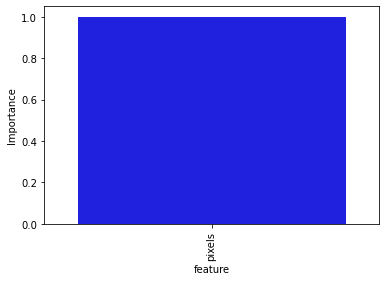

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df_important = pd.DataFrame({"feature":list(X.columns),"Importance":rfc.feature_importances_})
print(df_important)

#visualizing important features
# sns.barplot(x=df_important.feature,y=df_important.Importance,color="b")
# plt.xticks(rotation=90,color="black")
# plt.show()

In [51]:
p = data['pixels']
p.head()
print(p)

0      9 8 8 8 8 8 11 14 18 18 16 17 19 20 21 24 24 2...
1      63 49 14 11 13 15 21 17 17 8 18 20 18 18 24 27...
2      21 22 24 23 24 15 4 5 13 26 37 59 75 84 90 100...
3      92 96 214 255 255 255 254 254 254 255 226 103 ...
4      57 11 4 0 10 9 14 23 28 36 38 46 60 69 71 67 6...
                             ...                        
475    213 216 216 208 217 223 149 50 53 60 67 72 78 ...
476    150 158 152 118 88 112 158 148 104 96 110 129 ...
477    0 2 1 5 7 7 7 24 51 86 110 124 130 137 147 160...
478    34 33 18 4 0 0 1 1 0 4 1 35 72 100 120 136 148...
479    102 71 63 57 52 40 55 44 41 33 42 45 54 67 55 ...
Name: pixels, Length: 480, dtype: object


In [42]:
data_no_landmarks.head().plot(x='emotion', y='pixels', kind='bar')

TypeError: no numeric data to plot